# Step 4: Exploring Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Read the dataset
url = "https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv"
mcdonalds = pd.read_csv(url)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [4]:
print(mcdonalds.shape)

(1453, 15)


In [5]:
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [6]:
MD_x = mcdonalds.iloc[:, 0:11]

MD_x = (MD_x == "Yes").astype(int)

col_means = MD_x.mean()
print(round(col_means, 2))

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [7]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

variance_ratio = pca.explained_variance_ratio_
print("Proportion of Variance Explained by Each Principal Component:")
print(variance_ratio)

Proportion of Variance Explained by Each Principal Component:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [8]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

explained_var = pca.explained_variance_
prop_var = pca.explained_variance_ratio_
cum_prop_var = np.cumsum(pca.explained_variance_ratio_)

num_components = len(explained_var)
print("Importance of components:")
print(f"{'':<5}{'Standard deviation':<15}{'Proportion of Variance':<23}{'Cumulative Proportion':<21}")
for i in range(num_components):
    print(f"PC{i+1:<3}{explained_var[i]:<15.5f}{prop_var[i]:<23.5f}{cum_prop_var[i]:<21.5f}")

Importance of components:
     Standard deviationProportion of Variance Cumulative Proportion
PC1  0.57312        0.29945                0.29945              
PC2  0.36900        0.19280                0.49224              
PC3  0.25464        0.13305                0.62529              
PC4  0.15904        0.08310                0.70839              
PC5  0.11384        0.05948                0.76787              
PC6  0.09627        0.05030                0.81817              
PC7  0.08392        0.04385                0.86201              
PC8  0.07569        0.03955                0.90156              
PC9  0.07036        0.03676                0.93832              
PC10 0.06192        0.03235                0.97068              
PC11 0.05612        0.02932                1.00000              


In [9]:
num_components = len(pca.components_)

print("Principal Components:")
for i in range(num_components):
    print(f"PC{i+1}:")
    print(np.round(pca.components_[i], 1))

Principal Components:
PC1:
[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
PC2:
[ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
PC3:
[-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
PC4:
[ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
PC5:
[-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
PC6:
[ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
PC7:
[-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
PC8:
[ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
PC9:
[ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
PC10:
[-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
PC11:
[ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]


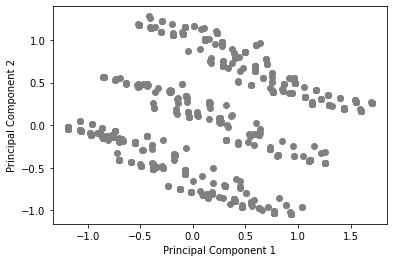

In [10]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Step 5: Extracting Segments


### Using k-Means

In [11]:
from sklearn.cluster import KMeans

# Assuming MD.x is the matrix in Python (numpy array format)
# Set the random seed
np.random.seed(1234)

# Initialize variables to store the clustering results
clustering_results = []

# Perform clustering for different numbers of clusters (2 to 8)
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    labels = kmeans.fit_predict(MD_x)
    clustering_results.append(labels)

# You can inspect the clustering results to analyze the clusters obtained
clustering_results

[array([1, 0, 0, ..., 0, 0, 1]),
 array([1, 2, 2, ..., 2, 0, 1]),
 array([0, 3, 3, ..., 3, 2, 1]),
 array([4, 1, 2, ..., 2, 3, 0]),
 array([5, 2, 0, ..., 0, 1, 3]),
 array([4, 0, 3, ..., 3, 6, 1]),
 array([1, 0, 0, ..., 5, 2, 3])]

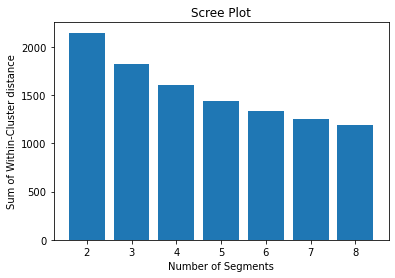

In [50]:
# Assuming MD.x is the matrix in Python (numpy array format)
# Set the random seed
np.random.seed(1234)

# Initialize variables to store inertia values
inertia_values = []

# Perform k-means clustering for different numbers of clusters (2 to 8)
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)

# Plotting the inertia or within-cluster sum of squares
plt.bar(range(2, 9), inertia_values)
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Within-Cluster distance')
plt.title('Scree Plot')
plt.show()


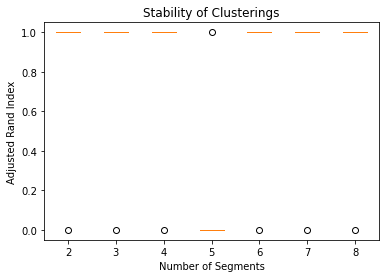

In [18]:
# Set the random seed
np.random.seed(1234)

# Assuming MD_x is the matrix in Python (numpy array format)
# Initialize variables
n_clusters_range = range(2, 9)
n_rep = 10
n_boot = 100

# Function to perform k-means clustering on a dataset
def kmeans_clustering(MD_x, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_rep, random_state=1234)
    kmeans.fit(MD_x)
    return kmeans.labels_

# Generate bootstrap samples
n_samples = MD_x.shape[0]
bootstrap_indices = np.random.choice(n_samples, size=(n_boot, n_samples), replace=True)

# Perform k-means clustering on each bootstrap sample
cluster_assignments = np.zeros((n_boot, n_samples))
for i in range(n_boot):
    bootstrap_sample = MD_x.iloc[bootstrap_indices[i]]  # Use iloc to select rows
    for n_clusters in n_clusters_range:
        labels = kmeans_clustering(bootstrap_sample, n_clusters)
        cluster_assignments[i, :] += labels * (10 ** n_clusters)  # Making unique labels for different clusters
from sklearn.metrics import adjusted_rand_score

# Calculate stability (e.g., adjusted Rand index) between clusterings
stability_matrix = np.zeros((len(n_clusters_range), len(n_clusters_range)))
for i, n_clusters1 in enumerate(n_clusters_range):
    for j, n_clusters2 in enumerate(n_clusters_range):
        # Measure stability using adjusted Rand index
        stability = adjusted_rand_score(cluster_assignments[:, i], cluster_assignments[:, j])
        stability_matrix[i, j] = stability

# Plotting the stability using boxplots
plt.figure(figsize=(8, 6))
plt.boxplot(stability_matrix.T)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Stability of Clusterings')
plt.xticks(np.arange(1, len(n_clusters_range) + 1), n_clusters_range)
plt.show()

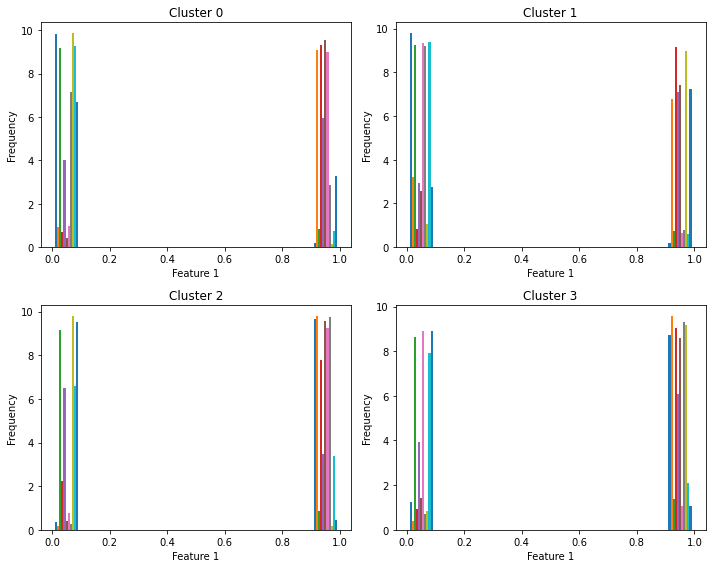

In [76]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans.fit(MD_x)
labels = kmeans.labels_

# Create subplots for each cluster
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate through clusters and create histograms
for cluster_num in range(4):
    row = cluster_num // 2
    col = cluster_num % 2
    axs[row, col].hist(MD_x[labels == cluster_num], bins=10,density=True)
    axs[row, col].set_title(f'Cluster {cluster_num}')
    axs[row, col].set_xlabel('Feature 1')
    axs[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



In [90]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans.fit(MD_x)
centroids=kmeans.cluster_centers_
centroids


array([[0.01923077, 0.90659341, 0.08241758, 0.93131868, 0.59615385,
        0.95604396, 0.9010989 , 0.28571429, 0.01373626, 0.07417582,
        0.32967033],
       [0.02083333, 0.67916667, 0.075     , 0.91666667, 0.70833333,
        0.74166667, 0.06666667, 0.07916667, 0.89583333, 0.0625    ,
        0.725     ],
       [0.96622889, 0.98123827, 0.08442777, 0.77861163, 0.34896811,
        0.9587242 , 0.92307692, 0.97373358, 0.01876173, 0.33958724,
        0.04690432],
       [0.87341772, 0.95886076, 0.13607595, 0.90506329, 0.60759494,
        0.85759494, 0.10759494, 0.93037975, 0.91772152, 0.20886076,
        0.10759494]])

<module 'matplotlib.pyplot' from 'C:\\Users\\Devashish Manda\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

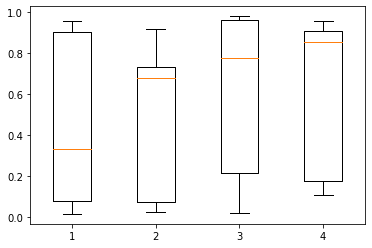

In [94]:
plt.boxplot(centroids.T)
plt

##### The below code performs similar tasks to the R code provided earlier. It conducts KMeans clustering with different cluster numbers, calculates silhouette scores to evaluate the clustering stability, and then plots the silhouette scores against the number of clusters.

#### This Python code doesn't replicate the exact steps of the R code, as the slswFlexclust function or its exact functionality isn't directly available in Python's standard libraries. However, using silhouette scores provides a means to evaluate the quality and stability of clustering solutions.

<module 'matplotlib.pyplot' from 'C:\\Users\\Devashish Manda\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

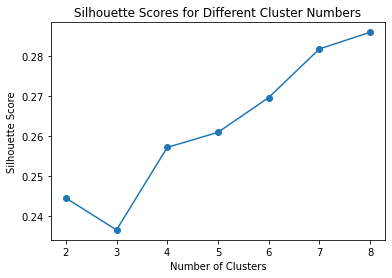

In [93]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming MD_x is your processed dataset in Python (numpy array or DataFrame format)

# Function to perform KMeans clustering
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
    labels = kmeans.fit_predict(data)
    return labels

# Set up the range of clusters
n_clusters_range = range(2, 9)
n_rep = 10

# Initialize an array to store silhouette scores
silhouette_scores = []

# Perform clustering for each cluster number
for n_clusters in n_clusters_range:
    cluster_assignments = np.zeros((n_rep, len(MD_x)))
    for i in range(n_rep):
        # Generate cluster assignments
        labels = kmeans_clustering(MD_x, n_clusters)
        cluster_assignments[i] = labels

    # Calculate silhouette scores and store the mean
    silhouette = silhouette_score(MD_x, np.mean(cluster_assignments, axis=0))
    silhouette_scores.append(silhouette)

# Plot the silhouette scores against the number of clusters
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Cluster Numbers')
plt
